In [11]:
from typing import Dict

from datasets import load_dataset, Dataset

import pandas as pd
from transformers import AutoTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
datasets: Dict[str, Dataset] = {}

datasets['ds_imdb'] = load_dataset("imdb")
datasets['sst'] = load_dataset("sst")
datasets['tweet'] = load_dataset("tweet_eval", "sentiment")
datasets['rotten'] = load_dataset("rotten_tomatoes")
datasets['amazon'] = load_dataset("amazon_reviews_multi", "en")   # cannot use for money ever
datasets['yelp'] = load_dataset("yelp_review_full") # cannot use for money ever
datasets['financ'] = load_dataset("financial_phrasebank", "sentences_75agree")  # Must ask for commercial license
datasets['amzpol'] = load_dataset("amazon_polarity")
datasets['movrat'] = load_dataset("movie_rationales")
datasets['multisen'] = load_dataset("tyqiangz/multilingual-sentiments", "english")  # Check that it's different from the other amazon free one
datasets['cyrpol'] = load_dataset("CyranoB/polarity")

Found cached dataset imdb (/home/alberto/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1)


  0%|          | 0/3 [00:00<?, ?it/s]

No config specified, defaulting to: sst/default
Found cached dataset sst (/home/alberto/.cache/huggingface/datasets/sst/default/1.0.0/b8a7889ef01c5d3ae8c379b84cc4080f8aad3ac2bc538701cbe0ac6416fb76ff)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset tweet_eval (/home/alberto/.cache/huggingface/datasets/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset rotten_tomatoes (/home/alberto/.cache/huggingface/datasets/rotten_tomatoes/default/1.0.0/40d411e45a6ce3484deed7cc15b82a53dad9a72aafd9f86f8f227134bec5ca46)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset amazon_reviews_multi (/home/alberto/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset yelp_review_full (/home/alberto/.cache/huggingface/datasets/yelp_review_full/yelp_review_full/1.0.0/e8e18e19d7be9e75642fc66b198abadb116f73599ec89a69ba5dd8d1e57ba0bf)


  0%|          | 0/2 [00:00<?, ?it/s]

Found cached dataset financial_phrasebank (/home/alberto/.cache/huggingface/datasets/financial_phrasebank/sentences_75agree/1.0.0/550bde12e6c30e2674da973a55f57edde5181d53f5a5a34c1531c53f93b7e141)


  0%|          | 0/1 [00:00<?, ?it/s]

Found cached dataset amazon_polarity (/home/alberto/.cache/huggingface/datasets/amazon_polarity/amazon_polarity/3.0.0/a27b32b7e7b88eb274a8fa8ba0f654f1fe998a87c22547557317793b5d2772dc)


  0%|          | 0/2 [00:00<?, ?it/s]

Found cached dataset movie_rationales (/home/alberto/.cache/huggingface/datasets/movie_rationales/default/0.1.0/70ed6b72496c90835e8ee73ebf8d0e49f5ad3aa93f302c8a4b6c886143cfb779)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset multilingual-sentiments (/home/alberto/.cache/huggingface/datasets/tyqiangz___multilingual-sentiments/english/1.0.0/b7cdd8874d82679e59432edf79e074f595c4ad26d2e562eba4fb55f361691b07)


  0%|          | 0/3 [00:00<?, ?it/s]

Found cached dataset polarity (/home/alberto/.cache/huggingface/datasets/CyranoB___polarity/CyranoB--polarity/3.0.0/09b42b491d298dbd043c0b1a57d426eaece8edeb7045a6f706687edb78cb6043)


  0%|          | 0/2 [00:00<?, ?it/s]

I want to see what the datasets are composed of: max, min, mean and median length of texts for each dataset (in terms of tokens)

In [13]:
max_num_tokens = 512
tokenizer_xlm = AutoTokenizer.from_pretrained("xlm-roberta-base", model_max_length=max_num_tokens, truncation=True)
tokenizer_xlnet = AutoTokenizer.from_pretrained("xlnet-large-cased", model_max_length=max_num_tokens, truncation=True)

In [14]:
df = pd.DataFrame.from_dict(datasets['ds_imdb']["train"])

In [15]:

df['tokenized_text_xlm'] = df['text'].apply(tokenizer_xlm)
df['tokenized_text_xlnet'] = df['text'].apply(tokenizer_xlnet)


Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors


In [16]:
def get_num_tokens(tokens):
    return len(tokens.encodings[0].ids)

In [17]:
df['number_tokens_xlm'] = df['tokenized_text_xlm'].apply(get_num_tokens)

<AxesSubplot: xlabel='number_tokens_xlm', ylabel='Count'>

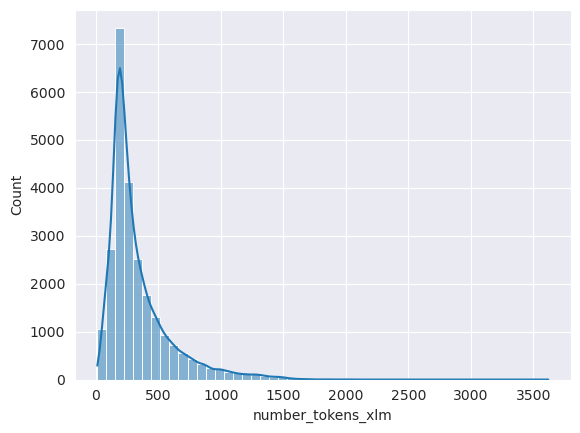

In [18]:
sns.histplot(data=df, x="number_tokens_xlm", bins=50, kde=True)

In [19]:
stats_token_counts = df.describe()['number_tokens_xlm']
stats_token_counts.loc['median'] = df['number_tokens_xlm'].median()

In [20]:
stats_token_counts

count     25000.00000
mean        337.01304
std         254.28834
min          13.00000
25%         178.00000
50%         249.00000
75%         410.00000
max        3618.00000
median      249.00000
Name: number_tokens_xlm, dtype: float64